In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rn
import seaborn as sns

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sui = pd.read_csv('/home/otavio/ml/datasets/world-data/suicide/suicide-rate-1990-2017.csv')
work = pd.read_csv('/home/otavio/ml/datasets/world-data/annual-hours-worked.csv')

In [3]:
sui = sui[sui['Year'] == 2017]
work = work[work['Year'] == 2016]

In [4]:
work = work.rename(columns={' (Annual hours worked per worker)':'wh'})

In [5]:
sui = sui.drop('Suicide rate in 1990 (deaths per 100,000)', axis=1).rename(columns={'Suicide rate (deaths per 100,000)':'rate'})

In [6]:
sui = sui[sui['Code'].notnull()]

In [7]:
work.sort_values('wh', ascending=False, inplace=True)
sui

,Entity,Code,Year,rate
27,Afghanistan,AFG,2017,9.188568
55,Albania,ALB,2017,5.108781
83,Algeria,DZA,2017,4.124306
111,American Samoa,ASM,2017,6.738545
167,Andorra,AND,2017,7.912273
...,...,...,...,...
6271,Vietnam,VNM,2017,7.422038
6383,World,OWID_WRL,2017,9.976258
6411,Yemen,YEM,2017,6.013435
6439,Zambia,ZMB,2017,13.060061


In [8]:
data = sui.merge(work, on='Entity')
data

,Entity,Code_x,Year_x,rate,Code_y,Year_y,wh
0,Argentina,ARG,2017,10.609682,ARG,2016,1743.30
1,Armenia,ARM,2017,8.263799,ARM,2016,1842.00
2,Australia,AUS,2017,11.046885,AUS,2016,1785.58
3,Austria,AUT,2017,11.202157,AUT,2016,1623.29
4,Bangladesh,BGD,2017,6.032121,BGD,2016,2371.81
...,...,...,...,...,...,...,...
62,United Kingdom,GBR,2017,7.356321,GBR,2016,1679.76
63,United States,USA,2017,12.835757,USA,2016,1774.69
64,Uruguay,URY,2017,16.818157,URY,2016,1576.27
65,Venezuela,VEN,2017,8.677951,VEN,2016,1777.85


(array([1200., 1400., 1600., 1800., 2000., 2200., 2400., 2600., 2800.]),
 <a list of 9 Text yticklabel objects>)

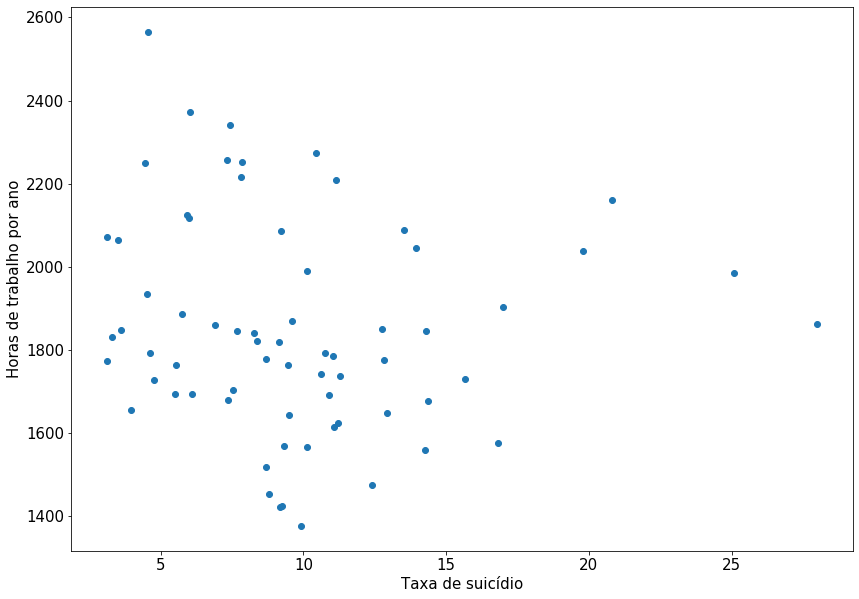

In [13]:
ax, fig = plt.subplots(figsize=(14, 10))
plt.scatter(data['rate'], data['wh'], )
plt.ylabel('Horas de trabalho por ano', size=15)
plt.xlabel('Taxa de suicídio', size=15)
plt.xticks(size=15)
plt.yticks(size=15)

In [14]:
data.corr()

,Year_x,rate,Year_y,wh
Year_x,NaN,NaN,NaN,NaN
rate,NaN,1.000000,NaN,-0.095743
Year_y,NaN,NaN,NaN,NaN
wh,NaN,-0.095743,NaN,1.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Entity  67 non-null     object 
 1   Code_x  67 non-null     object 
 2   Year_x  67 non-null     int64  
 3   rate    67 non-null     float64
 4   Code_y  67 non-null     object 
 5   Year_y  67 non-null     int64  
 6   wh      67 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.2+ KB


In [35]:
data = data.sort_values('rate', ascending=False)
rank1 = data[:15]
rank2 = data[data['Entity'] == 'Brazil']
rank3 = data[-15:]
rank = pd.concat([rank1, rank2, rank3])
rank

,level_0,index,Entity,Code_x,Year_x,rate,Code_y,Year_y,wh
0,0,32,Lithuania,LTU,2017,27.990584,LTU,2016,1861.36
1,1,47,Russia,RUS,2017,25.087669,RUS,2016,1985.00
2,2,53,South Korea,KOR,2017,20.805660,KOR,2016,2161.05
3,3,55,Sri Lanka,LKA,2017,19.800419,LKA,2016,2038.54
4,4,31,Latvia,LVA,2017,16.988674,LVA,2016,1903.48
5,5,64,Uruguay,URY,2017,16.818157,URY,2016,1576.27
6,6,30,Japan,JPN,2017,15.647951,JPN,2016,1729.00
7,7,51,Slovenia,SVN,2017,14.378709,SVN,2016,1677.40
8,8,23,Hungary,HUN,2017,14.281731,HUN,2016,1846.81
9,9,6,Belgium,BEL,2017,14.275319,BEL,2016,1558.28
